# Titanic Survival (Have implement all the models for classification)

In [2]:
# hidding warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# importing required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# importing other required packages for ML modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [5]:
# Reading the required data
df= pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [6]:
df_raw=df.copy()
df_test_raw=df.copy()

# First Iteration

# Understanding the data

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

Data Description

- PassengerId. Unique identification of the passenger. It shouldn't be necessary for the machine learning model.
- Survived. Survival (0 = No, 1 = Yes). Binary variable that will be our target variable.
- Pclass. Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd). Ready to go.
- Name. Name of the passenger. We need to parse before using it.
- Sex. Sex. Categorical variable that should be encoded.
- Age. Age in years. Ready to go.
- SibSp. # of siblings / spouses aboard the Titanic. Ready to go.
- Parch. # of parents / children aboard the Titanic. Ready to go.
- Ticket. Ticket number. Big mess. We need to understand its structure first.
- Fare. Passenger fare. Ready to go.
- Cabin. Cabin number. It needs to be parsed.
- Embarked. Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). Categorical feature that should be encoded.

The main conclusion is that we already have a set of features that we can easily use in our machine learning model. Other features, like 'Name', 'Ticket', and 'Fare', require an additional effort before we can integrate them.

In [9]:
# checking out the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
# counting the null in each features
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Counting all the null in whole dataset
df.isnull().sum().sum()

866

Get the Quantative Statistics for numerical features: descriptive statistics

In [12]:
# descriptive statistics for numerical variable
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


If you want to get the statistics of categorical variable: they can provide the information only count, unique values, top repeated and its frequencey

In [13]:
# to get the statistics of all variable including categorical
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Fahlstrom, Mr. Arne Jonas",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


There are three aspects that usually catch my attention when I analyse descriptive statistics:

- Min and max values. This can give us an idea about the range of values and is helpful to detect outliers. In our case, all the min and max values seem reasonable and in a reasonable range of values. The only exception could eventually be the max value of 'Fare', but for now we will leave it as it is.
- Mean and standard deviation. The mean shows us the central tendency of the distribution, while the standard deviation quantifies its amount of variation. For example, a low standard deviation suggests that data points tend to be close to the mean. Giving a quick look to our values, there's nothing that looks like obviously wrong.
- Count. This is important to give us a first perception about the volume of missing data. Here, we can see that some 'Age' data is missing.

Since there's nothing shocking about the variables, let's proceed to the next step: missing data.

In [14]:
# define the function which counts the total missing values
# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [15]:
# implement the above function to put them in table
draw_missing_data_table(df)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


Another Method for doing the same thing

In [16]:
# #missing data (without using function)
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total Missing', 'Missing Percent'])
missing_data.head(20)

,Total Missing,Missing Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


We can see Cabin has 77% data missing so it is better to remove that features which has more than 30% data missing

In [17]:
# Drop Cabin
df.drop('Cabin', axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Missing value imputation for other two features Age and Embark

In [18]:
# Fill missing values in Age with a specific value
df['Age'].fillna(1000, inplace=True)
#checkout the max value in age for verification
df['Age'].max()

1000.0

In [19]:
# replace missing values in embark by mode
df['Embarked'].fillna(df.Embarked.mode()[0], inplace=True)
# if you want to replace with mean and median just change mode and put as you want
#df['Age'].fillna(df.Age.mean(), inplace=True)

In [20]:
df.Embarked.isnull().sum()

0

In [21]:
# checking the values in Embarked
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [22]:
# check out all the columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# MVM: minimum Variable model

- The 'Minimum Viable Product' (MVP) is a key concept for any lean startup. Once the problem to solve is figured out, the focus of the startup should be in the development of a solution, the MVP, as fast as they can. Thanks to the MVP, it is possible to begin the learning process and improve the solution towards users needs.

To keep hyper_link in jupyter notebook use [visible Notes](invisible url)
- [Goodfellow et al. (2016)](http://www.deeplearningbook.org/contents/guidelines.html)  proposes an analogous approach for the application of machine learning models. As the authors point out, the successful application of machine learning techniques goes beyond the knowledge of algorithms and their principles. To successfully apply machine learning techniques, we need to start with a simple model that we can master and understand. Only then we should move to more complex algorithms.

The authors propose a practical four-steps methodology:

- Select a performance metric and a target value for this metric. This metric will guide your work and allow you to know how well you're performing. In our case, our performance metric will be 'accuracy' because it is the one defined by Kaggle.
- Quickly set up a working end-to-end pipeline. This should allow you to estimate the selected performance metric.
Monitor the system to understand its behaviour, in particular to understand whether its poor performance is related to underfitting, overfitting or defects.
- Improve the system by iteration. Here we can apply feature engineering, tune hyperparameters or even change the algorithm, according to the outputs of our monitoring system.
- We will follow this methodology. Accordingly, our aim will be to get an initial model that we can use as a first baseline approach. This model will be our 'Minimum Viable Model' (MVM). Note that right now it doesn't matter much how well the model performs. We just need a starting point. All in all, we're entrepreneurs. Worst case scenario, we name this model as 'beta version' :P

Ok, let's prepare the data for the MVM launching, fit a logistic regression to it, and analyse the performance of the model through [learning and validation curves](https://scikit-learn.org/stable/modules/learning_curve.html).

# Data preparation

We don't need 'PassengerId' for prediction purposes, so we will exclude it.


In [23]:
# we don't need passengers ID so remove them
df.drop(['PassengerId'], axis=1, inplace=True)

In [24]:
# verify our job
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
# check data types
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

- 'Sex', 'Embarked', and 'Pclass' should be categorical. I'll not consider 'Survived' as categorical because it's the output variable.
- We need to parse 'Name' and 'Ticket'. For now, I'll ignore these features.
- 'SibSp' could be grouped with 'Parch' to create a 'Family' feature. For now, I'll just identify if the passenger is travelling alone or with family.

In [26]:
# Define categorical variables
df['Sex'] = pd.Categorical(df['Sex'])
df['Embarked'] = pd.Categorical(df['Embarked'])

In [27]:
df.dtypes

Survived       int64
Pclass         int64
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Embarked    category
dtype: object

In [28]:
#Again dropping name and ticket 
df.drop(['Name','Ticket'],axis=1, inplace=True)

# Feature engineering
We can merge and create several features based on the need without loosing information given to us
- Here we merge two features sibsp and parch: create the new one 'familysize'

In [29]:
# merge two features and create the new one
df['familysize']=df['SibSp']+df['Parch']

Again drop the two Sibsp and Parch features because we already merged them to create another one

In [30]:
df.drop(['SibSp','Parch'],axis=1, inplace=True)

# In order to implement the model we should do encoding for the categorical variables

In [31]:
# use get_dummies function from python to do encoding for categorical vari
data=pd.get_dummies(df, drop_first=True)

In [32]:
data.head()

,Survived,Pclass,Age,Fare,familysize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,1,0,1
1,1,1,38.0,71.2833,1,0,0,0
2,1,3,26.0,7.9250,0,0,0,1
3,1,1,35.0,53.1000,1,0,0,1
4,0,3,35.0,8.0500,0,1,0,1


In [33]:
# dividing the data set with predictor (X) and outcome variable (Y)

X = data[data.loc[:, data.columns != 'Survived'].columns]
Y = data['Survived']

Train and test split

In [34]:
# Create data set to train and test (80-20)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=1)

Debugging

In [35]:
# check inputs
print("Input variavle  \n", X_train.head())

Input variavle  
      Pclass     Age     Fare  familysize  Sex_male  Embarked_Q  Embarked_S
301       3  1000.0  23.2500           2         1           1           0
309       1    30.0  56.9292           0         0           0           0
516       2    34.0  10.5000           0         0           0           1
120       2    21.0  73.5000           2         1           0           1
570       2    62.0  10.5000           0         1           0           1


In [36]:
# check output variables
print("Output variable  \n", y_train.head())

Output variable  
 301    1
309    1
516    1
120    0
570    1
Name: Survived, dtype: int64


# Model Fitting

# Logistic Regression Classification Model

In [37]:
# Fit logistic regression
logreg = LogisticRegression();
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
# Model performance
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.797 +/- 0.046


# Accessing the model performance

Here we check the Learning curve and Valideation curve

In [39]:
# define the function for learning curver
# Plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

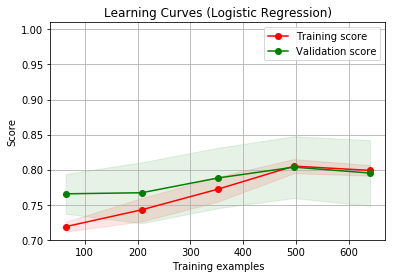

In [40]:
# Plot learning curves
title = "Learning Curves (Logistic Regression)"
cv = 10
plot_learning_curve(logreg, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

# Learning curve explanation

Learning curves in a nutshell:

- Learning curves allow us to diagnose if the is overfitting or underfitting.
- When the model overfits, it means that it performs well on the training set, but not not on the validation set. Accordingly, the model is not able to generalize to unseen data. If the model is overfitting, the learning curve will present a gap between the training and validation scores. Two common solutions for overfitting are reducing the complexity of the model and/or collect more data.
- On the other hand, underfitting means that the model is not able to perform well in either training or validations sets. In those cases, the learning curves will converge to a low score value. When the model underfits, gathering more data is not helpful because the model is already not being able to learn the training data. Therefore, the best approaches for these cases are to improve the model (e.g., tuning the hyperparameters) or to improve the quality of the data (e.g., collecting a different set of features).
Discussion of our results:

- The model doesn't overfit. As we can see, the curves converge and no gap between the training and the validation score exists in the last points of the curve.
- The model underfits. Our final score is about 0.796. Although our model does better predictions than a flip-a-coin strategy, it is still far from being an 'intelligent' model. For now, it's just an 'artificial' model.

In [41]:
# define the functio for validation curve
# Plot validation curve
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid() 
    plt.xscale('log')
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)

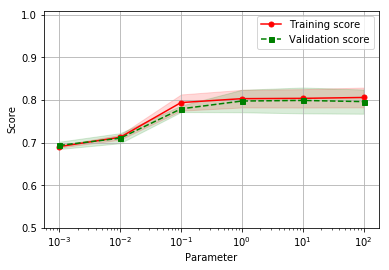

In [42]:
# Plot validation curve
title = 'Validation Curve (Logistic Regression)'
param_name = 'C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] 
cv = 10
plot_validation_curve(estimator=logreg, title=title, X=X_train, y=y_train, param_name=param_name,
                      ylim=(0.5, 1.01), param_range=param_range);

# Validation curve explanation
Validation curves in a nutshell:

- Validation curves are a tool that we can use to improve the performance of our model. It counts as a way of tuning our hyperparameters.

- They are different from the learning curves. Here, the goal is to see how the model parameter impacts the training and validation scores. This allow us to choose a different value for the parameter, to improve the model.
- Once again, if there is a gap between the training and the validation score, the model is probably overfitting. In contrast, if there is no gap but the score value is low, we can say that the model underfits.

Discussion of our results:

- The figure shows that there is no huge difference in model's performance as far as we choose a C value of  10−1  or higher. 

Note that in a logistic regression, C is the only model parameter that we can change [Deatail for cost function](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

# Confusion Matrix

In [43]:
# import required packages
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

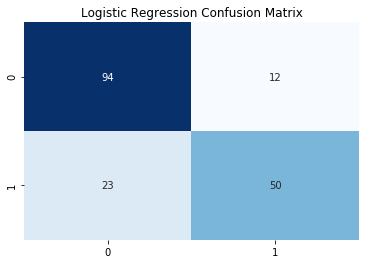

In [45]:
# Predicted Y values
y_predicted_logreg = logreg.predict(X_test)
cm_logreg = confusion_matrix(y_test,y_predicted_logreg)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_logreg,annot=True,cmap="Blues",fmt="d",cbar=False);

# Precision and recall

- Precision = TP/(TP+FP)
-  Recall=TP/(TP+FN)
- F1-score= 2\*Precision\*Recall/(Precision+recall)

-In our case
    - Precision =50/62=0.8064
    - Recall =50/73=0.6849
    - F1-Score=2(0.8)(0.68)/(0.68+0.80)=1.088/1.48=0.73

In [46]:
# Computing the average Precision-recall
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_predicted_logreg)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.68


# Printing Precision and Recall

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.68')

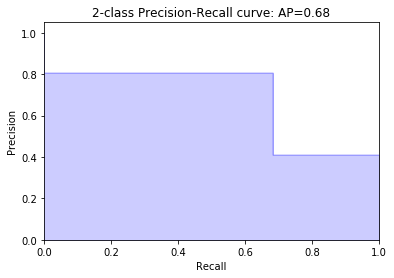

In [47]:
from sklearn.metrics import precision_recall_curve
from inspect import signature

precision, recall, _ = precision_recall_curve(y_test, y_predicted_logreg)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# computing precision, recall, F1-score, support
For the detail study about them: [Precision-recall-F1score-support](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)
- The support is the number of occurrences of each class in y_test

- 'micro':
    - Calculate metrics globally by counting the total true positives, false negatives and false positives.
- 'macro':
    - Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
- 'weighted':
    - Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

In [48]:
# import the function
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test, y_predicted_logreg, average='macro')

(0.8049352081610146, 0.7858619798397519, 0.7918950340475004, None)

In [49]:
precision_recall_fscore_support(y_test, y_predicted_logreg, average='weighted')

(0.8046556475102159, 0.8044692737430168, 0.8013257138191376, None)

In [50]:
precision_recall_fscore_support(y_test, y_predicted_logreg, average='micro')

(0.8044692737430168, 0.8044692737430168, 0.8044692737430168, None)

# Aread under the  (ROC) curve(AUC)/ ROC -receiver operating curver

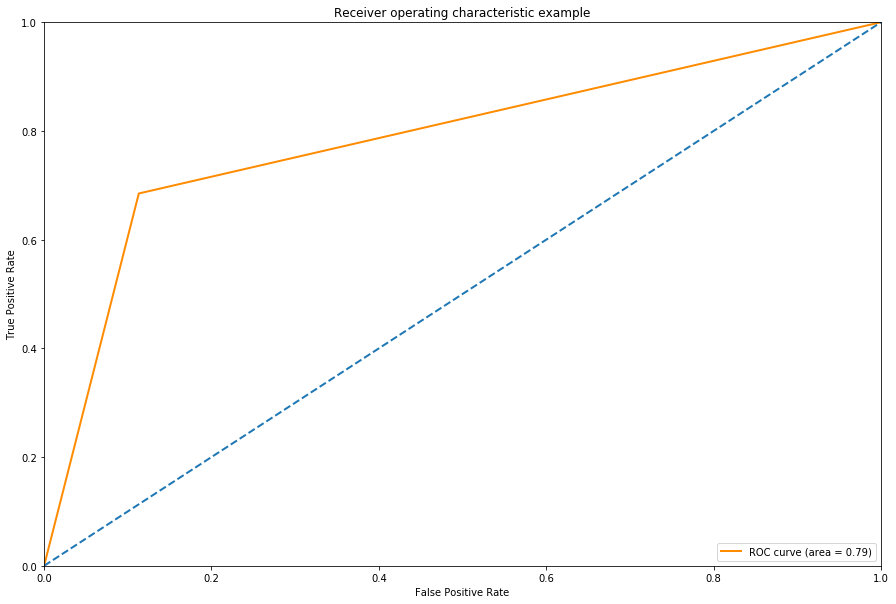

In [51]:
# For single class:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# we have to give y_test and y_predicted values for ROC curve


fpr, tpr, thresholds = roc_curve(y_test, y_predicted_logreg, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Fiting Different ML model

# K-Nearest Neighborhood Classification model

In [52]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [53]:
# Model performance for KNN
scores = cross_val_score(knn, X_train, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.704 +/- 0.049


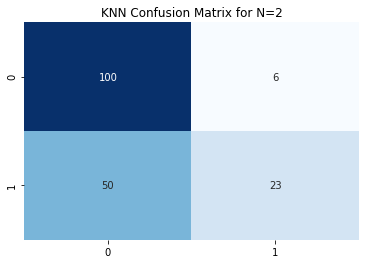

In [54]:
# Accessing the accuracy
y_predicted_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test,y_predicted_knn)
plt.title("KNN Confusion Matrix for N=2")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False);

# Support Vector Machine

In [55]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [56]:
# Model performance for KNN
scores = cross_val_score(svm, X_train, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.691 +/- 0.040


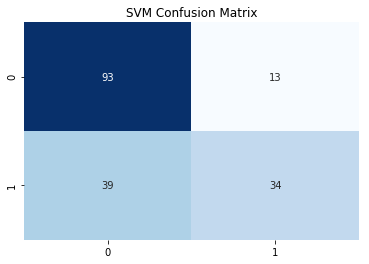

In [57]:
# Accessing the accuracy
y_predicted_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test,y_predicted_svm)
plt.title("SVM Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False);

# SVM with default parameter

In [58]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7094972067039106


# SVM with Default Linear Kernel


In [59]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.776536312849162


# SVM with Default RBF (radial basis function) Kernel

In [60]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.7094972067039106


# SVM with default Polynomial Kernel

In [ ]:
#don't run this (takes forever to compute)
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

# Naive Bayes Classification Model

In [61]:
# Naive-Bayes model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [62]:
y_predicted_NB=nb.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_predicted_NB))

Accuracy Score:
0.7821229050279329


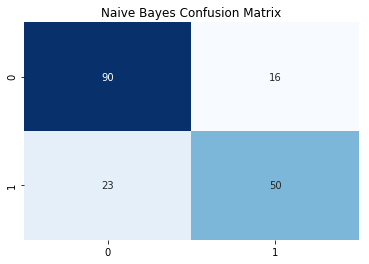

In [63]:
# Accessing the accuracy and confusion Matrix
y_predicted_NB = nb.predict(X_test)
cm_nb = confusion_matrix(y_test,y_predicted_NB)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False);

# Decision Tree Classification Model

In [64]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [65]:
# print the Accuracy
y_predicted_DT=dtc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_predicted_DT))

Accuracy Score:
0.7374301675977654


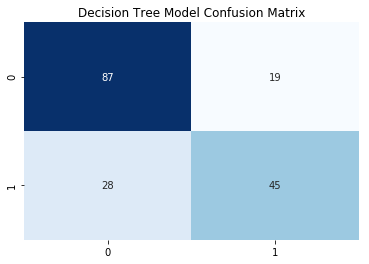

In [66]:
# Accessing the accuracy and confusion matrix
y_predicted_DT = dtc.predict(X_test)
cm_DT = confusion_matrix(y_test,y_predicted_DT)
plt.title("Decision Tree Model Confusion Matrix")
sns.heatmap(cm_DT,annot=True,cmap="Blues",fmt="d",cbar=False);

# Random Forest Classification Model

In [67]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [68]:
# print the Accuracy
y_predicted_RF=dtc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_predicted_RF))

Accuracy Score:
0.7374301675977654


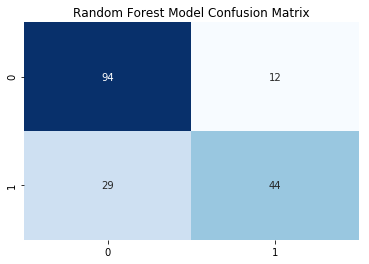

In [69]:
# Accessing the accuracy and confusion matrix
y_predicted_RF = rf.predict(X_test)
cm_RF = confusion_matrix(y_test,y_predicted_RF)
plt.title("Random Forest Model Confusion Matrix")
sns.heatmap(cm_RF,annot=True,cmap="Blues",fmt="d",cbar=False);

# Combine Confusion matrix togegher
- comparting all the confusion matrix together

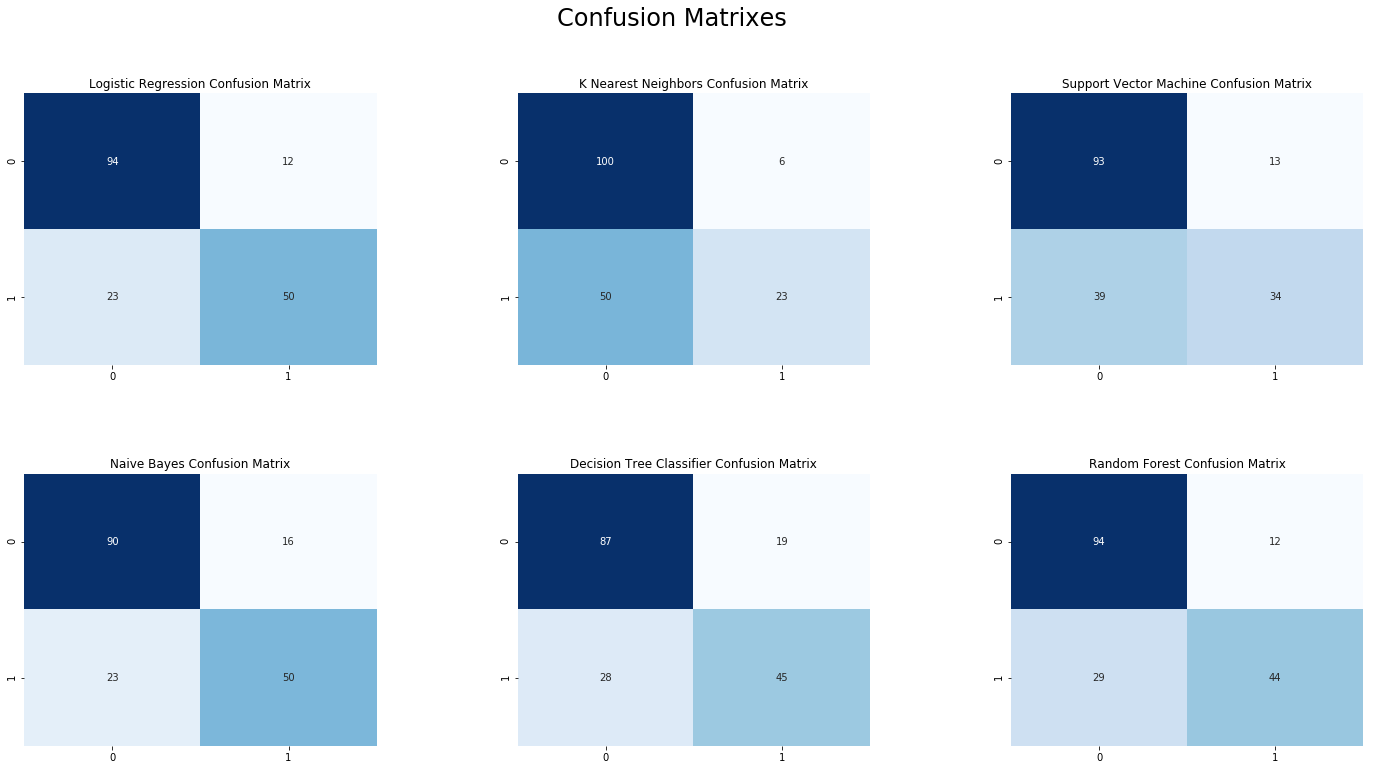

In [70]:
# Confusion matrix plot
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_logreg,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_DT,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_RF,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.show()

# Model Performance comparision

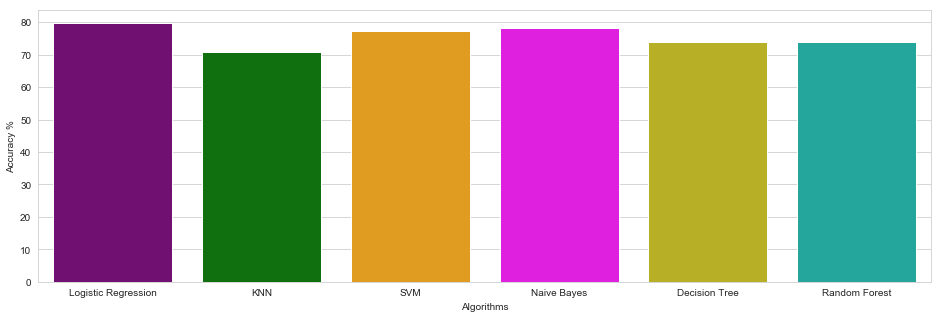

In [71]:
methods = ["Logistic Regression", "KNN", "SVM", "Naive Bayes", "Decision Tree", "Random Forest"]
accuracy = [79.76, 70.72, 77.21, 78.25, 73.74, 73.74]
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()

Here, we have implemented several classification model to get the accuracy. We saw that logistic regression has been the best performer for this dataset, with accuracy 79.76 %, where we removed name and ticket. 


- The learning and validation curves allow us to monitor system's performance.
- All three steps have been implemented but fourth step of modeling  to improve the model by iteration. This can be done by:

    - Improving the way how we handled 'Age' missing data. in the first iteration we decided to replace missing data by a unique value, but now we can go deeper and search for a better imputation strategy.
    
- Exploring data to understand which features can have impact in the model and how they can be manipulated to boost that impact.
- Building new features that can increase the predictive power of our model.
- This will lead us to a heavy data analysis process, which aims to improve model's performance just by the data quality side. In other words, we will not change our learning algorithm neither we will try to improve its parameters. We will only try to improve the performance of our model by enriching our data.

Good luck for the second iteration

# Second iteration

Let's start with the dataset that we saved earlier

In [95]:
# Reading the required data
df1= pd.read_csv('train.csv')

In [96]:
df1_raw=df1.copy()

In [97]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Feature Engineering

create the new familysize by adding to variables SibSp and Parch

In [98]:
# Family size feature
df1['FamilySize'] = df1['SibSp'] + df1['Parch']
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [99]:
# Drop the features which you merged to form a another
df1.drop(['SibSp', 'Parch'],axis=1, inplace=True)

In [100]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [101]:
# looking at the info of data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
FamilySize     891 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [102]:
# Define categorical variables
df1['Sex'] = pd.Categorical(df1['Sex'])
df1['Embarked'] = pd.Categorical(df1['Embarked'])

In [103]:
# Drop irrelevant features
df1.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1,0,3,male,22.0,7.2500,S,1
1,2,1,1,female,38.0,71.2833,C,1
2,3,1,3,female,26.0,7.9250,S,0
3,4,1,1,female,35.0,53.1000,S,1
4,5,0,3,male,35.0,8.0500,S,0


# Imputation of Age missing data
- Last time we implemented the dummy variable (1000)for age missing data, which was to get quick insight for modeling, but had several limitation. We replaced with unrealistic values, which are out of range and distorted the information and data distrubution. Lets do some logical imputation
- we can improve by imputing the age data from known relationship, like we can see the age from the title of the name (Master <13 years) some like this


- To implement this method, 

    - Extract titles from 'Name'.
    - Plot a figure with both features and confirm that there is a connection between titles and age.
    - For each title, get people's average age and use it to fill missing values.

Let's see how this work, before you start with sinking feelings.

In [104]:
# Inspect names
df1_raw['Name'].unique()[:10]

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)'], dtype=object)

From above we can see that rule is looking like:'last name' + ',' + 'title' + 'other names'

In [105]:
# Extract titles from name
df1['Title']=0
for i in df1:
    df1['Title']=df1_raw['Name'].str.extract('([A-Za-z]+)\.', expand=False)  # Use REGEX to define a search pattern
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,male,22.0,7.2500,S,1,Mr
1,2,1,1,female,38.0,71.2833,C,1,Mrs
2,3,1,3,female,26.0,7.9250,S,0,Miss
3,4,1,1,female,35.0,53.1000,S,1,Mrs
4,5,0,3,male,35.0,8.0500,S,0,Mr


In [106]:
# Unique titles
df1['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

Identify the age based on the title

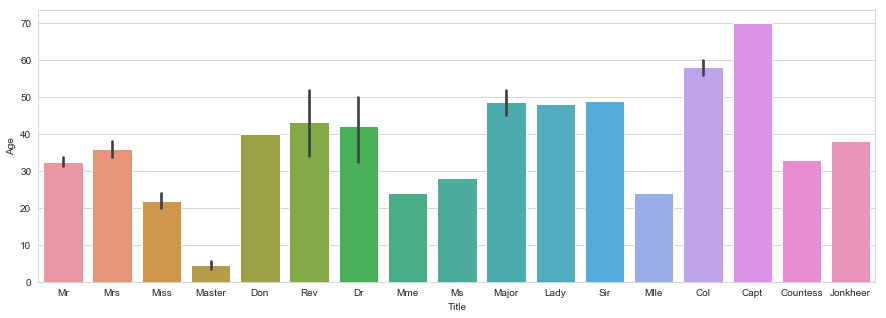

In [107]:
# Plot bar plot (titles, age and sex)
plt.figure(figsize=(15,5))
sns.barplot(x=df1['Title'], y=df1['Age']);

- Bar plot gives us an estimate of central tendency for a numeric variable (height of each rectangle) and an indication of the uncertainty around that estimate (error bars in black).

- Apart from Rev and Dr, which have a larger error bar, the mean value seems to accurately represent the data of all the other features. This validates our approach.

-Look [Error bar (blackline in the middle)](https://www.biologyforlife.com/interpreting-error-bars.html) for deatail 

In [109]:
# Lets compute the mean age for each title
# Means per title
df1_raw['Title'] = df1['Title']  # To simplify data handling
means = df1_raw.groupby('Title')['Age'].mean()
means.head(10)

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Name: Age, dtype: float64

In [110]:
# Transforming the average age to the dictionary for mapping
map_means = means.to_dict()
map_means

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 42.0,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 4.574166666666667,
 'Miss': 21.773972602739725,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.368090452261306,
 'Mrs': 35.898148148148145,
 'Ms': 28.0,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

In [111]:
# Imputation based on title
# Impute ages based on titles
idx_nan_age = df1.loc[np.isnan(df1['Age'])].index
df1.loc[idx_nan_age,'Age'].loc[idx_nan_age] = df1['Title'].loc[idx_nan_age].map(map_means)
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,1,0,3,male,22.0,7.2500,S,1,Mr
1,2,1,1,female,38.0,71.2833,C,1,Mrs
2,3,1,3,female,26.0,7.9250,S,0,Miss
3,4,1,1,female,35.0,53.1000,S,1,Mrs
4,5,0,3,male,35.0,8.0500,S,0,Mr


In [115]:
# Lets check out the imputed data
# Identify imputed data
df1['Imputed'] = 0
df1.at[idx_nan_age.values, 'Imputed'] = 1
df1.head(20)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,Imputed
0,1,0,3,male,22.0,7.2500,S,1,Mr,0
1,2,1,1,female,38.0,71.2833,C,1,Mrs,0
2,3,1,3,female,26.0,7.9250,S,0,Miss,0
3,4,1,1,female,35.0,53.1000,S,1,Mrs,0
4,5,0,3,male,35.0,8.0500,S,0,Mr,0
5,6,0,3,male,NaN,8.4583,Q,0,Mr,1
6,7,0,1,male,54.0,51.8625,S,0,Mr,0
7,8,0,3,male,2.0,21.0750,S,4,Master,0
8,9,1,3,female,27.0,11.1333,S,2,Mrs,0
9,10,1,2,female,14.0,30.0708,C,1,Mrs,0


# Explanatory Data Analysis

- EDA is one of the most imp steps in DA (Data Analysis) but can easily trapped and get lost into the process. 
- To avoid this trap, we follow the hypothesis driven approach consists  in establishing hypothesis about the variable behavior and their relationship, then focus on using data to prove it. which makes our analysis very objective because we will be collecting just enough data to test the specific hypothesis. 

- by doing this, it helps to increase the speed( coz we limit our analysis to some hypothesis and move forward), reduce the effort (the amount of data and no. of test will be only what is needed to verify the hypothesis), reduce the risk (wrong-fail, right-success)

- In hypothesis, we generate the hypothesis about the relationship between each variables and outcome variables, then we test the hypothesis through a set of EDA tools, which will enhance to get comprehensive view about the variable that should beling to our predictive model



# explanation features by features
- PassengerId. This is just an unique identification of each passenger. It's not expected to be relevant to our analysis.
- Survived. Target variable. To sink or not to sink is the question of this exercise.
- Pclass. This is the ticket class. This should affect our target variable. First class should have a higher survival rate.
- Name. Names are a form of social tagging, especially when accompanied by a title. As a consequence, it can lead to different forms of treatment. Let's keep an eye on this.
- Sex. Always important.
- Age. It should make a difference. For example, children are usually evacuated first in a disaster, so that we can think about a solution in silence... Joking, the true reason why 'Age' matters is this one.
- SibSp. Number of siblings/spouses aboard the Titanic. I'd say that it's easier to survive if you're with your family than if you're travelling alone. Teamwork!
- Parch. Number of parents/children aboard the Titanic. It should play with 'SibSp'.
- Ticket. This is the ticket number. Unless it has some information about places, it shouldn't be important for prediction purposes.
- Fare. Same logic as 'Pclass'.
- Cabin. The cabin number can indicate where people were during the disaster. It wouldn't be surprising if it had some influence in survival chances, but this variable was excluded due to the high percentage of missing values.

- Embarked. When the sun rises, it rises for everyone. It's not expectable that people coming from Cherbourg are more unlucky than people coming from Southampton. Unless there is some second order effect, like refusing to run away to keep your honor as a man, I would say that this variable is not important.


Step by Step Analysis

Looking at the outcome (Target) Variable- survived
    - 1= survived (not sink)
    - 0= not survived (sink)

In [117]:
# counting the survived 
df1.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

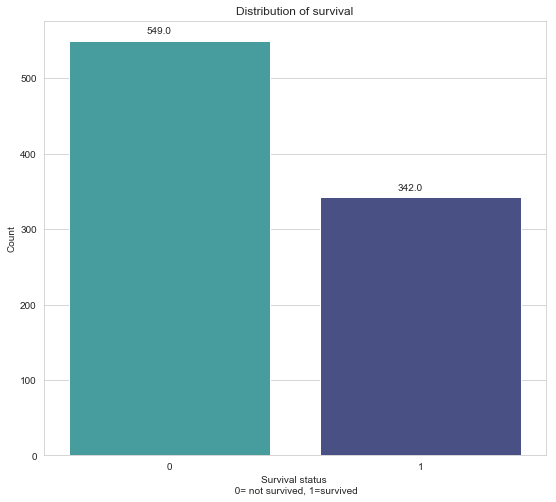

In [126]:
# Count plot for target variable
plt.figure(figsize=(9,8))
ax=sns.countplot(x="Survived", data=df1, palette='mako_r')
plt.title("Distribution of survival")
plt.xlabel("Survival status \n 0= not survived, 1=survived")
plt.ylabel("Count")
#get the height for the bar plot
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.31, p.get_height()+10))

In [127]:
# if you want to get the percentwise count plot
count_Sur=len(df1[df1.Survived==1])
count_Not_Sur=len(df1[df1.Survived==0])
print("Percent of Survived: {:.2f}%".format((count_Sur/(len(df1.Survived))*100)))
print("Percent of Not Survived: {:.2f}%".format((count_Not_Sur/(len(df1.Survived))*100)))

Percent of Survived: 38.38%
Percent of Not Survived: 61.62%


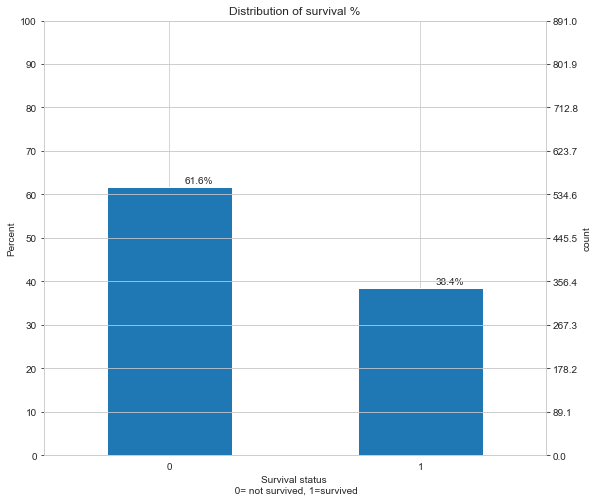

In [133]:
# Percentwise viusalization with % value on the top
# Count plot for target variable
plt.figure(figsize=(9,8))
plt.xlabel("Survival status \n 0= not survived, 1=survived")
ax=(df1.Survived.value_counts()/len(df1)*100).sort_index().plot(kind='bar',rot=0)
ax.set_yticks(np.arange(0,110,10)) 
plt.ylabel("Percent")

ax2=ax.twinx()
ax2.set_yticks(np.arange(0,110, 10)*len(df1)/100)
plt.title("Distribution of survival %")

plt.ylabel("count")
#get the height for the bar plot
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.31, p.get_height()+1))

In [134]:
#looking at the data for average age fare family
df1.groupby('Survived').mean()

,PassengerId,Pclass,Age,Fare,FamilySize,Imputed
Survived,,,,,,
0,447.016393,2.531876,30.626179,22.117887,0.883424,0.227687
1,444.368421,1.950292,28.343690,48.395408,0.938596,0.152047


Looking PClass

Hypothesis: Higher the class, higher the chances of survival. 
- This means that a person travelling in the first class has a higher chance of survival than a person traveling on the second or third class.

To visualize if there is a relationship between 'Pclass' and 'Survival', let's do a bar plot.

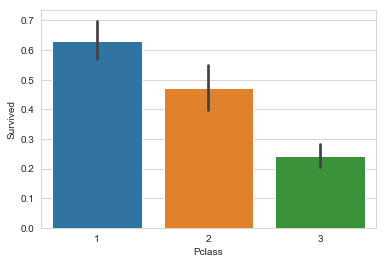

In [135]:
# Plot
sns.barplot(df['Pclass'],df['Survived']);

From, about 60% of the people travelling in the first class survived. In contrast, only approximately 25% of the people travelling in the third class survived. Accordingly, this plot suggests that the class in which people travel affects the chances of survival.

Name/Title

Hypothesis: title influence on survival
- here several title with some title shared by several people. so it would have been better if we group them for our analysis
- try to find the way to group title


In [137]:
# Count how many people have each of the titles
df1.groupby(['Title'])['PassengerId'].count()

Title
Capt          1
Col           2
Countess      1
Don           1
Dr            7
Jonkheer      1
Lady          1
Major         2
Master       40
Miss        182
Mlle          2
Mme           1
Mr          517
Mrs         125
Ms            1
Rev           6
Sir           1
Name: PassengerId, dtype: int64

From the result above
- Titles like 'Master', 'Miss', 'Mr', and 'Mrs', appear several times, we will not group them.
- Regarding Mme and Mlle, we can see here that they correspond to the categories Mrs and Miss, respectively. As a consequence, we will assign them to those titles.

Finally, we will group all the other titles in a new title named 'Other'. Then, we will define 'Title' as a categorical feature and plot it to see how it looks like. If it looks ok, we will proceed with this new categorization.

In [138]:
# Map of aggregated titles: title mapping
titles_dict = {'Capt': 'Other',
               'Major': 'Other',
               'Jonkheer': 'Other',
               'Don': 'Other',
               'Sir': 'Other',
               'Dr': 'Other',
               'Rev': 'Other',
               'Countess': 'Other',
               'Dona': 'Other',
               'Mme': 'Mrs',
               'Mlle': 'Miss',
               'Ms': 'Miss',
               'Mr': 'Mr',
               'Mrs': 'Mrs',
               'Miss': 'Miss',
               'Master': 'Master',
               'Lady': 'Other'}

In [151]:
# Group titles
df1['Title'] = df1['Title'].map(titles_dict)
df1['Title'].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [152]:
# filling null by others
df1['Title'].fillna('Others', inplace=True)

In [154]:
# Looking at the unique values
df1.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Others'], dtype=object)

In [155]:
# Transform into categorical
df1['Title'] = pd.Categorical(df1['Title'])
df1.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Sex            category
Age             float64
Fare            float64
Embarked       category
FamilySize        int64
Title          category
Imputed           int64
dtype: object

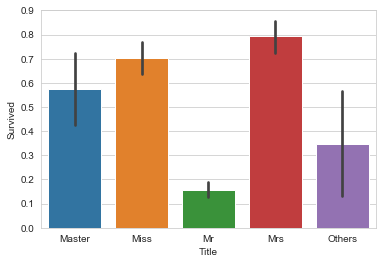

In [156]:
# Plot title 
sns.barplot(x='Title', y='Survived', data=df1);

As we already know, the bar plot shows us an estimate of the mean value (height of each rectangle) and an indication of the uncertainty around that central tendency (error bars).

Our results suggest that:

- People with the title 'Mr' survived less than people with any other title.
- Titles with a survival rate higher than 50% are those that correspond to female (Miss or Mrs) or children (Master) titles.
- Our new category, 'Other', should be more discretized. As we can see by the error bar (black line), there is a significant uncertainty around the mean value. Probably, one of the problems is that we are mixing male and female titles in the 'Other' category. We should proceed with a more detailed analysis to sort this out. Also, the category 'Master' seems to have a similar problem. For now, we will not make any changes, but we will keep these two situations in our mind for future improvement of our data set.

SEX

Sex is one of the most discussed topics in Human history. 
Women had a higher survival rate. Let's see what the plot says

Text(0.5, 0, 'Gender ')

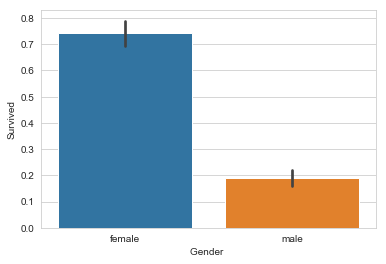

In [158]:
# Genderwise survival rate
sns.barplot(df1['Sex'],df1['Survived']);
plt.xlabel("Gender ")

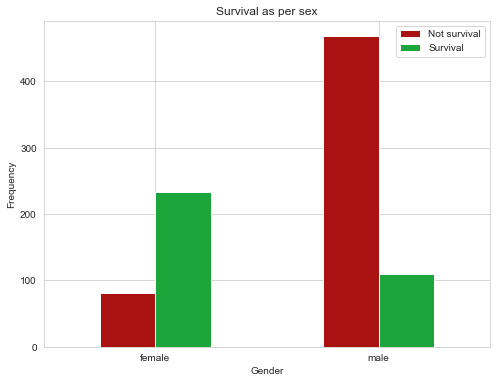

In [160]:
#Cross-check 
pd.crosstab(df1.Sex, df1.Survived).plot(kind="bar",figsize=(8,6), color=['#AA1111', '#1CA53B'])
plt.title("Survival as per sex")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.legend(["Not survival", "Survival"])
plt.ylabel("Frequency")
plt.show()

AGE

Hypothesis: children are more prone to survive, while people in its adult life may have a lower rate of survival. Let's get plot

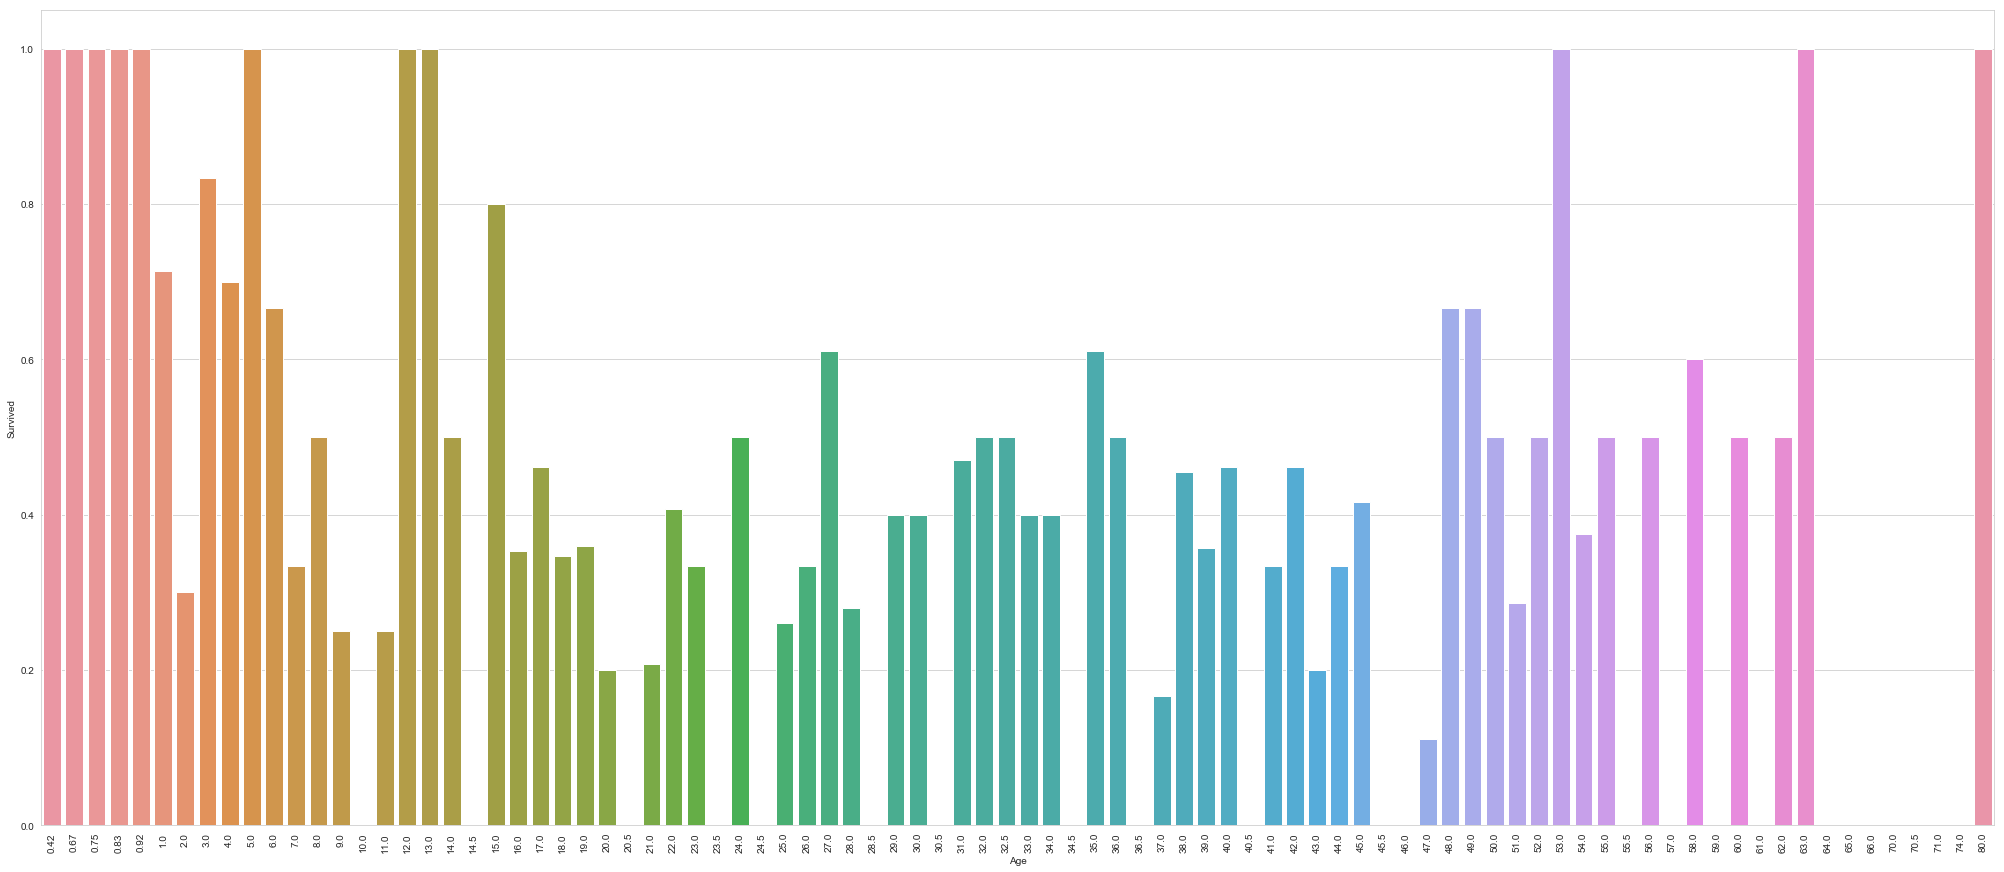

In [166]:
# Plot
plt.figure(figsize=(35,15))
sns.barplot(df1['Age'],df1['Survived'], ci=None)
plt.xticks(rotation=90);

Here we should use our intelligence: 

We can say that the plot has three regions:

- One region that goes between age 0 and 15;
- One between age 15 and 48;
- A last one between age 48 and 80.

It can be done in several way. I want to group as children, adults and elders. 


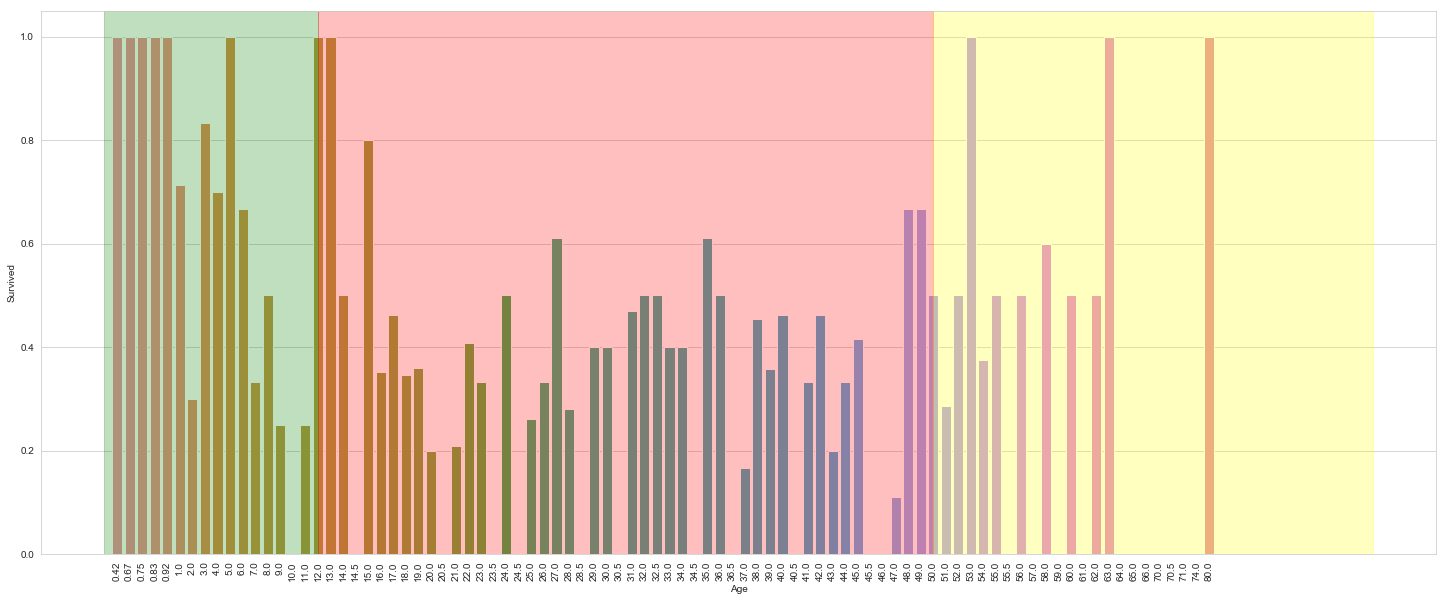

In [167]:
# Grouping 
limit_1 = 12
limit_2 = 50

x_limit_1 = np.size(df1[df1['Age'] < limit_1]['Age'].unique())
x_limit_2 = np.size(df1[df1['Age'] < limit_2]['Age'].unique())

plt.figure(figsize=(25,10))
sns.barplot(df1['Age'],df1['Survived'], ci=None)

plt.axvspan(-1, x_limit_1, alpha=0.25, color='green')
plt.axvspan(x_limit_1, x_limit_2, alpha=0.25, color='red')
plt.axvspan(x_limit_2, 100, alpha=0.25, color='yellow')

plt.xticks(rotation=90);

Now grouping the age according to the group that we defined and plotted as above

In [168]:
# Bin data
df1['Age'] = pd.cut(df1['Age'], bins=[0, 12, 50, 200], labels=['Child','Adult','Elder'])
df1['Age'].head()

0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
Name: Age, dtype: category
Categories (3, object): [Child < Adult < Elder]

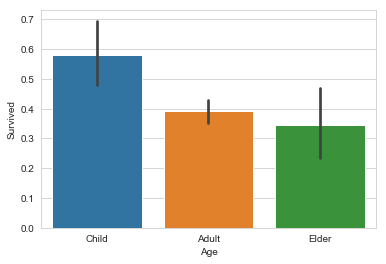

In [170]:
# Lets check the plot again
sns.barplot(df1['Age'], df1['Survived']);

Figure shows that children have a higher survival rate. It also shows that, in terms of survival, there is not a significant difference between the categories 'Adult' and 'Elder'. For now, we will not make any change because there is a theoretical rationale behind this categorization. Nonetheless, it seems that it would be enough to just distinguish between children and adults.

FAMILY SIZE:
- Hypothesis: who travels alone have lower survival rate. Higher the size bigger the survival rate. 
- Idea: family work on team to survive

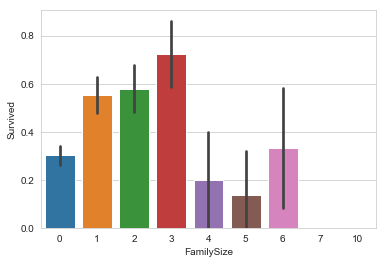

In [171]:
# Plot
sns.barplot(df1['FamilySize'], df1['Survived']);

As our assumption: hypothesis is true between 0 and 3, travelling alone has lower chance to survive than travelling 1 or more people. Howeveer, when family size is bigger than 3 it is opposite. 
- family size hypothesis should be revised when family size is bigger than 3 which means family size variable is complex. 


FARE: 

Hypothesis: as in Pclass variable, higher the fares, higher the survival rae. This is continuous variable so I use the box plot instead of barplot (barplot=mean) to do the comparison study for the continuous and categorical variable.

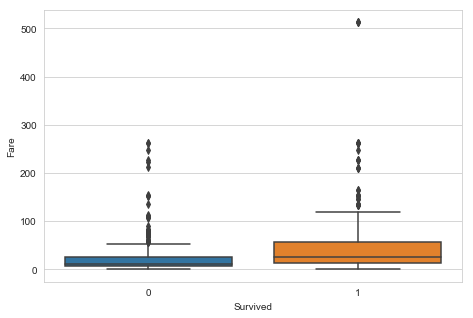

In [172]:
# Box-Plot for categorical and continuous variables
plt.figure(figsize=(7.5,5))
sns.boxplot(df1['Survived'], df1['Fare']);

This box plot show that who survived have paid higher fare. We believe, fare is connected with Pclass, lets do cross plot.

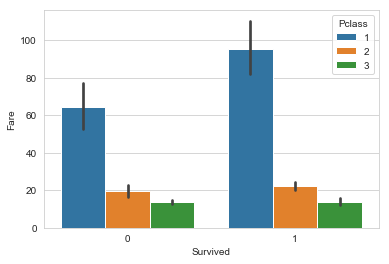

In [178]:
# cross plot
sns.barplot(df1['Survived'], df1['Fare'], df1['Pclass']);

This plot shows an interesting result.  'Fare' doesn't make difference, in terms of survival, if you are travelling in second or third class. However, if you are travelling in first class, the higher the fare, the higher the chances of survival. 
- Considering this, it would make sense to create interaction features between 'Fare' and 'Pclass'.

EMBARKED:

Hypothesis: Embark doesn't influence on survival, it is hard to say people from one particular place has higher chance of being survive than of other place unless there is some specific information. 

Lets check the plot

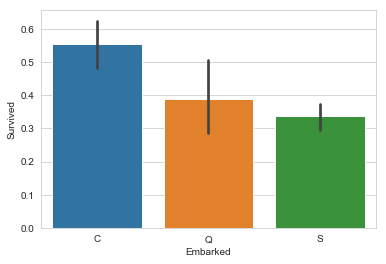

In [177]:
# Bar plot
sns.barplot(df1['Embarked'], df1['Survived']);

Look at the result, people from C has higher survival than other place. It is possible that this embark has some other link and hidding some information, plot couldn't give us what we thought. 

Let's do further analysis

In [175]:
# Compare with other variables
df1.groupby(['Embarked']).mean()

,Survived,Pclass,Age,Fare,familysize
Embarked,,,,,
C,0.553571,1.886905,250.035238,59.954144,0.750000
Q,0.389610,2.909091,646.577922,13.276030,0.597403
S,0.339009,2.346749,164.725619,27.243651,0.981424


From this we can see by looking at fare and pclass that embark with C have paid more fare and better class. 

Check Embark with age

In [179]:
# Relationship with age
df1.groupby(['Embarked','Age'])['PassengerId'].count()

Embarked  Age  
C         Child     11
          Adult    104
          Elder     15
Q         Child      4
          Adult     21
          Elder      3
S         Child     54
          Adult    455
          Elder     45
Name: PassengerId, dtype: int64

This result shows there is no significance difference between age and embark

Check Embark with sex

In [180]:
# Relationship with sex
df1.groupby(['Embarked','Sex'])['PassengerId'].count()

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
Name: PassengerId, dtype: int64

This shows that there is no significance difference

Little bit of Data Analysis

In [182]:
df1.groupby(['Sex', 'Survived', 'Pclass', 'Embarked']).mean()

PassengerId        Fare  FamilySize   Imputed
Sex    Survived Pclass Embarked                                               
female 0        1      C          178.000000   28.712500    0.000000  0.000000
                       Q                 NaN         NaN         NaN       NaN
                       S          398.500000  151.550000    3.000000  0.000000
                2      C                 NaN         NaN         NaN       NaN
                       Q                 NaN         NaN         NaN       NaN
                       S          423.500000   18.250000    0.666667  0.000000
                3      C          388.375000   14.653125    1.125000  0.375000
                       Q          612.444444   10.904633    1.000000  0.444444
                       S          419.781818   21.969018    2.800000  0.181818
       1        1      C          429.476190  117.710019    0.833333  0.119048
                       Q          413.000000   90.000000    1.000000  0.000000
                       S          517.130435   96.743298    1.152174  0.086957
                2      C          467.000000   25.268457    1.285714  0.000000
                       Q          313.500000   12.350000    0.000000  0.500000
                       S          446.540984   22.272951    1.147541  0.016393
                3      C          488.800000   14.717220    1.533333  0.266667
                       Q          288.208333   10.084033    0.250000  0.791667
                       S          351.666667   13.171842    1.303030  0.060606
male   0        1      C          381.320000   80.847160    0.520000  0.200000
                       Q          246.000000   90.000000    2.000000  0.000000
                       S          432.745098   53.563316    0.509804  0.215686
                2      C          363.625000   25.418225    1.000000  0.125000
                       Q          627.000000   12.350000    0.000000  0.000000
                       S          460.719512   18.997561    0.402439  0.073171
                3      C          454.909091    8.720842    0.242424  0.454545
                       Q          449.833333   11.841550    0.722222  0.638889
                       S          458.090909   12.758689    0.809524  0.203463
       1        1      C          571.705882  112.197806    0.647059  0.058824
                       Q                 NaN         NaN         NaN       NaN
                       S          501.107143   51.832739    0.714286  0.142857
                2      C          688.000000   25.433350    1.000000  0.500000
                       Q                 NaN         NaN         NaN       NaN
                       S          379.266667   20.516667    1.200000  0.066667
                3      C          434.700000   11.435840    0.800000  0.300000
                       Q          547.333333   12.916667    0.666667  0.666667
                       S          442.647059   17.033450    0.588235  0.117647

From all the result above we can see Embark has no significance impact on survival. 

- we say people travelling in better class and with high fare have impactful survival stutus. 

- I'm not deleting the variable because I am not 100% sure it doesn't have impact


# Feature Extraction

Feature is completely technical skill in ML. We should find the informative and compact set of features to improve the performance of ML models. 

- pick features that can characterize the behaviour of what we are trying to model. For instance, if we want to model the weather, features like temperature, humidity and wind are informative (they are related to the problem). By contrast, the result of a football game will not be an informative feature because it doesn't affect the weather.

-  'compact' mean  exclude irrelevant features from our model. There are several reasons to exclude irrelevant features. In our case, I'd say that the most important is to reduce overfitting. Taking the weather example again: we know that football scores do not affect weather, but suppose that all rain instances in our training set happen to occur after a Benfica victory. Then, our model might learn that rain is related to Benfica's victories, which is not true. Such an incorrect generalization from an irrelevant feature of the training set would result in a machine learning model that fits a particular set of data, but fails to predict future observations reliably (overfitting).

These two main issues are addressed in the following sub-sections:

- Feature engineering, which is related to the generation of informative features;
- Feature selection, which regards the choice of a compact set of features.

# Feature Engineering

Feature engineering is the art of converting raw data into useful features. A very nice list of feature engineering is gien here [Feature engineering in Predictive modeling](https://arxiv.org/pdf/1701.07852.pdf)

In Feature engineering I will use the following two techniques: 
- Box-Cox Transformation [The Analysis of Transformation](https://www.nuffield.ox.ac.uk/users/cox/cox72.pdf)
- Polynomials generation through non-linear expansions.

Before implement those techniques: we should do some data preparation

# DATA Preparation

In [183]:
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title,Imputed
0,1,0,3,male,Adult,7.2500,S,1,Mr,0
1,2,1,1,female,Adult,71.2833,C,1,Mrs,0
2,3,1,3,female,Adult,7.9250,S,0,Miss,0
3,4,1,1,female,Adult,53.1000,S,1,Mrs,0
4,5,0,3,male,Adult,8.0500,S,0,Mr,0


We don't need the passenger ID for modeling

In [184]:
# Drop feature PassengerID
df1.drop('PassengerId', axis=1, inplace=True)

In [185]:
df1.dtypes

Survived         int64
Pclass           int64
Sex           category
Age           category
Fare           float64
Embarked      category
FamilySize       int64
Title         category
Imputed          int64
dtype: object

Since Pclass is categorical so convert into categorical

In [186]:
# Transform object into categorical
df1['Embarked'] = pd.Categorical(df1['Embarked'])
df1['Pclass'] = pd.Categorical(df1['Pclass'])
df1.dtypes

Survived         int64
Pclass        category
Sex           category
Age           category
Fare           float64
Embarked      category
FamilySize       int64
Title         category
Imputed          int64
dtype: object

# Encoding: 

In [188]:
# Transform categorical features into dummy variables
df1 = pd.get_dummies(df1, drop_first=1)  
df1.head()

,Survived,Fare,FamilySize,Imputed,Pclass_2,Pclass_3,Sex_male,Age_Adult,Age_Elder,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0,7.2500,1,0,0,1,1,1,0,0,1,0,1,0,0
1,1,71.2833,1,0,0,0,0,1,0,0,0,0,0,1,0
2,1,7.9250,0,0,0,1,0,1,0,0,1,1,0,0,0
3,1,53.1000,1,0,0,0,0,1,0,0,1,0,0,1,0
4,0,8.0500,0,0,0,1,1,1,0,0,1,0,1,0,0


# Train and Test split
- here we devide our dataset into train and test set as 80/20

In [189]:
# Get training and test sets
from sklearn.model_selection import train_test_split

X = df1[data1.loc[:, df1.columns != 'Survived'].columns]
y = df1['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# Box-Cox Transformation
- Box-Cox transformations aim to normalize variables. 
- it is alternative transformations of other transformation such as square root transformations, log transformations, and inverse transformations. 
- The main advantage of Box-Cox transformations is that they optimally normalize the chosen variable. 
- Thus, they avoid the need to randomly try different transformations and automatize the data transformation process.

In [190]:
# Apply Box-Cox transformation for continous variable
from scipy.stats import boxcox

X_train_transformed = X_train.copy()
X_train_transformed['Fare'] = boxcox(X_train_transformed['Fare'] + 1)[0]
X_test_transformed = X_test.copy()
X_test_transformed['Fare'] = boxcox(X_test_transformed['Fare'] + 1)[0]

# Polynomials generation through non-linear expansions

- One standard way to enrich our set of features is to generate polynomials. Polynomial expansion creates interactions between features, as well as creates powers (e.g. square of a feature). This way we introduce a nonlinear dimension to our data set, which can improve the predictive power of our model.

- We should scale our features when we have polynomial or interaction terms in our model. These terms tend to produce multicollinearity, which can make our estimates very sensitive to minor changes in the model. Scaling features to a range allow us to reduce multicollinearity [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity) and its problems.

- To scale the features, we will transform the data so that it lies between a given minimum and maximum value. We will follow the common practice and say that our minimum value is 0, and our maximum value is 1.

In [192]:
# Rescale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_transformed_scaled = scaler.fit_transform(X_train_transformed);
X_test_transformed_scaled = scaler.transform(X_test_transformed);

/anaconda3/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Getting polynomial features

In [193]:
# Get polynomial features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2).fit(X_train_transformed)
X_train_poly = poly.transform(X_train_transformed_scaled)
X_test_poly = poly.transform(X_test_transformed_scaled)

In [194]:
# Debug
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x0 x13', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x1 x13', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x2 x13', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x3 x13', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x4 x13', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x5 x13', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x6 x13', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x7 x13', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x8 x13', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x9 x13', 'x10^2', 'x10 x11', '

# Feature Selection

The next step is to perform feature selection. Feature selection is about chosing the relevant information. It is good to add and generate features, but at some point we need to exclude irrelevant features. Otherwise, we will be penalizing the predictive power of our model. You can find a concise introduction to the feature selection subject in [Guyon & Elisseeff (2003)](http://www.jmlr.org/papers/volume3/guyon03a/guyon03a.pdf).

In this work, we will use a univariate statistics approach. This approach selects features based on univariate statistical tests between each feature and the target variable. The intuition is that features that are independent from the target variable, are irrelevant for classification.

We will use the chi-squared test for feature selection. This means that we have to choose the number of features that we want in the model. For example, if we want to have three features in our model, the method will select the three features with highest  χ2  score.

Since we don't know the ideal number of features, we will test the method with all the possible number of features and choose the number of features with better performance.

Univeriate Statistics

In [196]:
# Select features using chi-squared test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Get score using original model
logreg = LogisticRegression(C=1)
logreg.fit(X_train, y_train)
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('CV accuracy (original): %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))
highest_score = np.mean(scores)

## Get score using models with feature selection
for i in range(1, X_train_poly.shape[1]+1, 1):
    # Select i features
    select = SelectKBest(score_func=chi2, k=i)
    select.fit(X_train_poly, y_train)
    X_train_poly_selected = select.transform(X_train_poly)

    # Model with i features selected
    logreg.fit(X_train_poly_selected, y_train)
    scores = cross_val_score(logreg, X_train_poly_selected, y_train, cv=10)
    print('CV accuracy (number of features = %i): %.3f +/- %.3f' % (i, np.mean(scores), np.std(scores)))
    
    # Save results if best score
    if np.mean(scores) > highest_score:
        highest_score = np.mean(scores)
        std = np.std(scores)
        k_features_highest_score = i
    elif np.mean(scores) == highest_score:
        if np.std(scores) < std:
            highest_score = np.mean(scores)
            std = np.std(scores)
            k_features_highest_score = i
        
# Print the number of features
print('Number of features when highest score: %i' % k_features_highest_score)

CV accuracy (original): 0.822 +/- 0.036
CV accuracy (number of features = 1): 0.789 +/- 0.049
CV accuracy (number of features = 2): 0.789 +/- 0.049
CV accuracy (number of features = 3): 0.789 +/- 0.049
CV accuracy (number of features = 4): 0.789 +/- 0.049
CV accuracy (number of features = 5): 0.789 +/- 0.049
CV accuracy (number of features = 6): 0.789 +/- 0.049
CV accuracy (number of features = 7): 0.785 +/- 0.043
CV accuracy (number of features = 8): 0.785 +/- 0.043
CV accuracy (number of features = 9): 0.785 +/- 0.043
CV accuracy (number of features = 10): 0.798 +/- 0.042
CV accuracy (number of features = 11): 0.798 +/- 0.042
CV accuracy (number of features = 12): 0.798 +/- 0.042
CV accuracy (number of features = 13): 0.798 +/- 0.042
CV accuracy (number of features = 14): 0.798 +/- 0.042
CV accuracy (number of features = 15): 0.798 +/- 0.042
CV accuracy (number of features = 16): 0.795 +/- 0.038
CV accuracy (number of features = 17): 0.795 +/- 0.038
CV accuracy (number of features = 

# Unicorn Model

- we started we simply model application
- we been scaling with our result from first iteration: imputed missing data, did EDA, extracted features

- Now use highly accurate model


# Model fitting with best feature combination

select the important features

In [197]:
# Select features
select = SelectKBest(score_func=chi2, k=k_features_highest_score)
select.fit(X_train_poly, y_train)
X_train_poly_selected = select.transform(X_train_poly)

Modeling with those selected features

In [198]:
# Fit model
logreg = LogisticRegression(C=1)
logreg.fit(X_train_poly_selected, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Accessing Model performance

In [199]:
# Model performance
scores = cross_val_score(logreg, X_train_poly_selected, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.825 +/- 0.040


Plotting Learning Curve

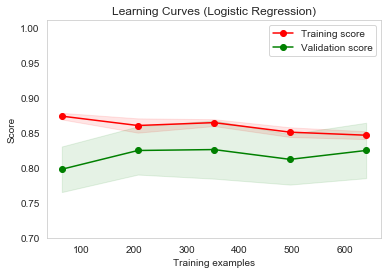

In [200]:
# Plot learning curves
title = "Learning Curves (Logistic Regression)"
cv = 10
plot_learning_curve(logreg, title, X_train_poly_selected, 
                    y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

Looks good no overfitting and underfitting sign

Validation Curve plotting

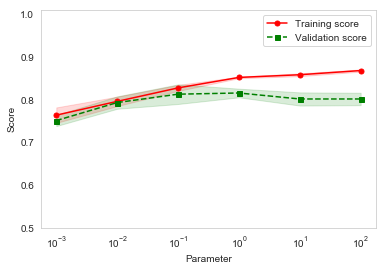

In [201]:
# Plot validation curve
title = 'Validation Curve (Logistic Regression)'
param_name = 'C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] 
cv = 10
plot_validation_curve(estimator=logreg, title=title, X=X_train_poly_selected, y=y_train, 
                      param_name=param_name, ylim=(0.5, 1.01), param_range=param_range);

We used C=1, which is on the edge of overfitting. Regarding underfitting, there are no signs of it since the model performs well.

# Fitting the different model for selected fetures

# SVM with Linear Kernel

In [ ]:
#SVM model fitting (don't run this takes long time to compute)
svc=SVC(kernel='linear')
svc.fit(X_train_poly_selected,y_train)
y_pred=svc.predict(X_test_poly)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

In [ ]:
df1.head()